In [75]:
# Import libraries
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [76]:
# Put CSV file in dataframe
df_products = pd.read_csv("all_products.csv")
df_inflation = pd.read_csv("inflation_per_month.csv")
df_nasdaq = pd.read_csv("nasdaq_historical_data.csv")
df_temp = pd.read_csv("average_temp.csv")

In [77]:
# Show first 5 rows of products dataframe
df_products.head()

,product_name,year,month,us_city_average_retail_price,category
0,American Cheese,1984,1,2.485,Dairy Products
1,American Cheese,1984,2,2.495,Dairy Products
2,American Cheese,1984,3,2.493,Dairy Products
3,American Cheese,1984,4,2.501,Dairy Products
4,American Cheese,1984,5,2.472,Dairy Products


In [78]:
# Show first 5 rows of average inflation rate
df_inflation.head()

,year,month,cpi_overall_monthly_change_in_perc
0,1974,1,9.4
1,1974,2,10.0
2,1974,3,10.4
3,1974,4,10.1
4,1974,5,10.7


In [79]:
# Show first five row of average monthly nasdaq stock price dataframe
df_nasdaq.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1985-01-01,247.100006,278.899994,245.800003,278.700012,278.700012,1782060000
1,1985-02-01,277.899994,289.299988,277.899994,284.200012,284.200012,1742850000
2,1985-03-01,285.100006,287.799988,275.600006,279.200012,279.200012,1611310000
3,1985-04-01,279.500000,284.799988,276.200012,280.600006,280.600006,1506450000
4,1985-05-01,280.500000,294.799988,278.799988,290.799988,290.799988,1673270000


In [80]:
# Show first five rows of average US temperature dataframe
df_temp.head()

,Date,Value,Anomaly
0,198001,31.12,1.00
1,198002,32.85,-0.97
2,198003,39.36,-2.14
3,198004,51.44,0.39
4,198005,60.28,0.08


In [81]:
# Convert date feature from nasdaq dataframe to datetime format
date = pd.to_datetime(df_nasdaq['Date'], format='%Y-%m-%d')

# Put month & year values of Date feature of nasdaq dataframe in seperate columns
df_nasdaq['year'] = date.dt.year
df_nasdaq['month'] = date.dt.month

# Drop Date feature from nasdaq dataframe
df_nasdaq.drop(['Date'], axis=1, inplace=True)

In [82]:
print(df_temp.Date.astype(str).str[:4].astype(int))

0      1980
1      1980
2      1980
3      1980
4      1980
       ... 
513    2022
514    2022
515    2022
516    2023
517    2023
Name: Date, Length: 518, dtype: int64


In [83]:
df_temp['Date'].unique()

array([198001, 198002, 198003, 198004, 198005, 198006, 198007, 198008,
       198009, 198010, 198011, 198012, 198101, 198102, 198103, 198104,
       198105, 198106, 198107, 198108, 198109, 198110, 198111, 198112,
       198201, 198202, 198203, 198204, 198205, 198206, 198207, 198208,
       198209, 198210, 198211, 198212, 198301, 198302, 198303, 198304,
       198305, 198306, 198307, 198308, 198309, 198310, 198311, 198312,
       198401, 198402, 198403, 198404, 198405, 198406, 198407, 198408,
       198409, 198410, 198411, 198412, 198501, 198502, 198503, 198504,
       198505, 198506, 198507, 198508, 198509, 198510, 198511, 198512,
       198601, 198602, 198603, 198604, 198605, 198606, 198607, 198608,
       198609, 198610, 198611, 198612, 198701, 198702, 198703, 198704,
       198705, 198706, 198707, 198708, 198709, 198710, 198711, 198712,
       198801, 198802, 198803, 198804, 198805, 198806, 198807, 198808,
       198809, 198810, 198811, 198812, 198901, 198902, 198903, 198904,
      

In [84]:
df_temp['year'] = df_temp.Date.astype(str).str[:4].astype(int)
df_temp['month'] = df_temp.Date.astype(str).str[-2:].astype(int)
df_temp.drop(['Date', 'Anomaly'], axis=1, inplace=True)
df_temp.rename(columns={"Value": "average_temp"}, inplace=True)
df_temp.head()

,average_temp,year,month
0,31.12,1980,1
1,32.85,1980,2
2,39.36,1980,3
3,51.44,1980,4
4,60.28,1980,5


In [85]:
# Get the mean of all products prices per month & year in products dataframe
prd_price = df_products.groupby(by=['category','product_name', 'year','month']).mean().reset_index()

# Sort dataframe on product name, month & year
prd_price = prd_price.sort_values(by=['category', 'product_name', 'month', 'year'])

# Show first five rows
prd_price.head()

,category,product_name,year,month,us_city_average_retail_price
0,Animal Products,Beef chunks,1980,1,1.821
12,Animal Products,Beef chunks,1981,1,1.856
24,Animal Products,Beef chunks,1982,1,1.794
36,Animal Products,Beef chunks,1983,1,1.756
48,Animal Products,Beef chunks,1984,1,1.721


In [86]:
# Left join nasdaq dataframe to products dataframe on year & month
prd_price = pd.merge(prd_price, df_nasdaq, how='left', on=['year', 'month'])

In [87]:
# Get rows with years later than 1985 and first column of nasdaq dataframe
prd_price = prd_price[prd_price['year'] >= 1985].iloc[:, 0:6]

# Show first five rows of dataframe
prd_price.head()

,category,product_name,year,month,us_city_average_retail_price,Open
5,Animal Products,Beef chunks,1985,1,1.711,247.100006
6,Animal Products,Beef chunks,1986,1,1.662,325.000000
7,Animal Products,Beef chunks,1987,1,1.694,351.299988
8,Animal Products,Beef chunks,1988,1,1.736,335.100006
9,Animal Products,Beef chunks,1989,1,1.806,378.899994


In [88]:
# Set index of dataframe to category, product_name, year & month features
prd_price = prd_price.set_index(['category', 'product_name', 'year', 'month'])

# Get difference in percentage of product price & nasdaq stock with the price a the year prior 
# Reset index back to original index
avg_diff = prd_price.pct_change().reset_index()

# Show first five rows of dataframe
avg_diff.head()

,category,product_name,year,month,us_city_average_retail_price,Open
0,Animal Products,Beef chunks,1985,1,NaN,NaN
1,Animal Products,Beef chunks,1986,1,-0.028638,0.315257
2,Animal Products,Beef chunks,1987,1,0.019254,0.080923
3,Animal Products,Beef chunks,1988,1,0.024793,-0.046114
4,Animal Products,Beef chunks,1989,1,0.040323,0.130707


In [89]:
# Left join average inflation data on year & month
avg_diff = pd.merge(avg_diff, df_inflation,  how='left', on=['year', 'month'])

# Show first five rows of dataframe
avg_diff.head()

,category,product_name,year,month,us_city_average_retail_price,Open,cpi_overall_monthly_change_in_perc
0,Animal Products,Beef chunks,1985,1,NaN,NaN,3.5
1,Animal Products,Beef chunks,1986,1,-0.028638,0.315257,3.9
2,Animal Products,Beef chunks,1987,1,0.019254,0.080923,1.5
3,Animal Products,Beef chunks,1988,1,0.024793,-0.046114,4.0
4,Animal Products,Beef chunks,1989,1,0.040323,0.130707,4.7


In [90]:
# Left join average US temperature data on year & month
avg_diff = pd.merge(avg_diff, df_temp,  how='left', on=['year', 'month'])

# Show first five rows of dataframe
avg_diff.head()

,category,product_name,year,month,us_city_average_retail_price,Open,cpi_overall_monthly_change_in_perc,average_temp
0,Animal Products,Beef chunks,1985,1,NaN,NaN,3.5,26.31
1,Animal Products,Beef chunks,1986,1,-0.028638,0.315257,3.9,34.68
2,Animal Products,Beef chunks,1987,1,0.019254,0.080923,1.5,31.44
3,Animal Products,Beef chunks,1988,1,0.024793,-0.046114,4.0,27.79
4,Animal Products,Beef chunks,1989,1,0.040323,0.130707,4.7,34.09


In [91]:
# Divide inflation percentage by 100 to normalize feature
avg_diff['cpi_overall_monthly_change_in_perc'] = avg_diff['cpi_overall_monthly_change_in_perc']/100

# Show first five rows of dataframe
avg_diff.head()

,category,product_name,year,month,us_city_average_retail_price,Open,cpi_overall_monthly_change_in_perc,average_temp
0,Animal Products,Beef chunks,1985,1,NaN,NaN,0.035,26.31
1,Animal Products,Beef chunks,1986,1,-0.028638,0.315257,0.039,34.68
2,Animal Products,Beef chunks,1987,1,0.019254,0.080923,0.015,31.44
3,Animal Products,Beef chunks,1988,1,0.024793,-0.046114,0.040,27.79
4,Animal Products,Beef chunks,1989,1,0.040323,0.130707,0.047,34.09


In [92]:
# Renaming column names for more clarity on feature meaning
avg_diff.rename(columns={'us_city_average_retail_price':'avg_price_diff_in_perc', 'Open':'nasdaq_open_price', 'cpi_overall_monthly_change_in_perc':'overall_inflation_in_perc'}, inplace=True)

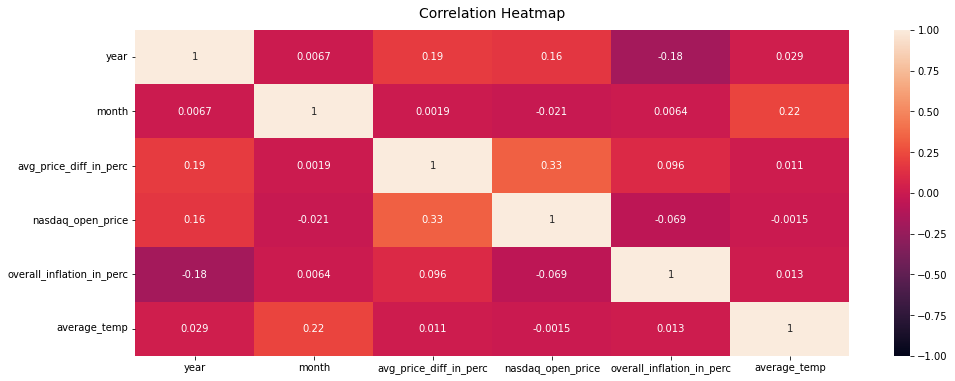

In [93]:
# Check if there is a correlation with average price difference over year and inflation
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))

# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(avg_diff.corr(), vmin=-1, vmax=1, annot=True)

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

In [94]:
# Drop month feature because of insignificance to other features
avg_diff.drop(['month'], axis=1, inplace=True)

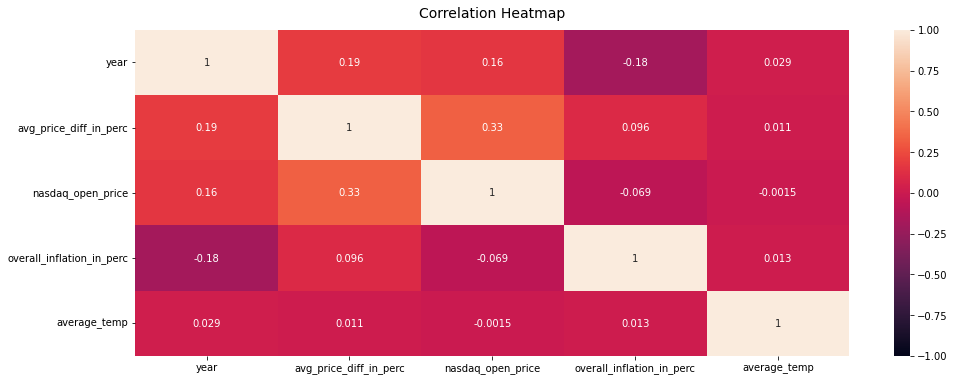

In [95]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))

# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(avg_diff.corr(), vmin=-1, vmax=1, annot=True)

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

In [96]:
# Train model on inflation, year and price difference ??